<a href="https://colab.research.google.com/github/yasserius-ml/reinforment_learning_sutton_barto/blob/master/Ch_2_MultiArm_Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<img src="https://www.casinonewsdaily.com/wp-content/uploads/guides/illustrations/slots/history/herbert-stephen-mills.jpg" width="70%">

## A simple example in plain English

- Multi-Arm Bandits are a class of decision making problems with a statistical learning goal. 
  - For example, imagine a row of slot machine, where you put in a coin, turn the arm and wait to see if the three wheels match. 
  - If so, yay, you won a reward. 
  - Else, meh, you lost a coin (a negative reward.)

- Multi-arm refers to the multiple action choices, and in the row of slot machines that are available to you. 
  - Bandit is just the machine itself, giving out rewards for actions, not to be confused with a theif. 
  - Assuming each slot machine gives out a different amount of reward on average (we don't know which one), the way to maximize rewards is to invest some coins to sample some rewards from all the slot machines. 
  - After maybe 100 coins on all of them, one of the slot machine stands out above all else in giving rewards. 
  - And this is the optimal action therefore. 
  - Playing this slot machine (in comparison to other arms) will output the most rewards probably.

- But 100 samples might be misleading, since we are interested in getting as close as possible to the true distribution of rewards for all the slot machines. 
  - And so, spending more coins to explore the slot machines instead of exploiting the current insight is necessary to learn the true distribution.

- Another assumption we've made above is that the rewards distribution of the slot machine above stays the same, which is called a stationary distribution. 
- But the casino management might have programmed it to change its rewards on average from time to time, hence it may be non-stationary.





# Completely Greedy 10-Armed Bandit

## Initializing the variables

In [ ]:
import numpy as np

actions = np.arange(10)
N_a = np.zeros(10)
Q_a = np.zeros(10)
Q_actual = np.random.randn(10)

[Initialization]
Actions: 
 [0 1 2 3 4 5 6 7 8 9]
Number of times each action is taken: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Expected reward (value): 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual Reward Distribution Mean: 
 [-0.06197548 -1.19337511 -0.2092313   0.68281048 -1.44629233  0.24763103
 -0.55392806  0.56365293  1.23149129 -1.05784978]


## Let's get a feel of the internal variables

In [ ]:
print("[Initialization]")
print("Actions: \n", actions)
print("Number of times each action is taken: \n", N_a)
print("Expected reward (value): \n", Q_a)
print("Actual Reward Distribution Mean: \n", Q_actual)

## Defining the bandit

In [ ]:
def bandit(action):
  return np.random.randn() + Q_actual[action]

for _ in range(10):
  print(bandit(1))

-2.1355492399956555
-2.3065986426587446
-0.05826084387637409
-2.1941765166977154
-2.373285781798838
-1.7564296278808187
-0.3030524738665108
-1.0491102450084762
-0.8961757701885598
-0.04829713688336734


## Defining update function for estimated reward / value

In [ ]:
def update_estimate(reward, action, Q_a):
  Q_a[action] += 1/N_a[action] * (reward - Q_a[action])
  
  return Q_a

## Running 100 trails of the bandit and learning

In [ ]:
for _ in range(100):
  action = np.argmax(Q_a)
  reward = bandit(action)
  N_a[action] += 1
  Q_a = update_estimate(reward, action, Q_a)

print(Q_actual)
print(Q_a)
print(N_a)

[-0.06197548 -1.19337511 -0.2092313   0.68281048 -1.44629233  0.24763103
 -0.55392806  0.56365293  1.23149129 -1.05784978]
[-0.18632915 -1.98569721 -0.96012502 -0.56568262 -0.68694119 -2.13452467
 -1.34379817  0.50976771  0.          0.        ]
[  1.   1.   1.   2.   3.   1.   2. 289.   0.   0.]


## Plot of estimated reward after 100 trials

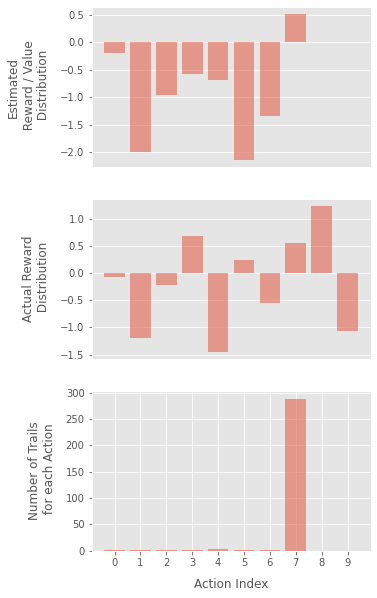

In [ ]:
with plt.style.context('ggplot'):
  fig = plt.figure(figsize=(5,10))

  fig.subplots_adjust(wspace=1.0, hspace=0.2)

  ax1 = fig.add_subplot(3, 1, 1)

  ax1.bar(actions, Q_a, align='center', alpha=0.5)
  ax1.set_xticks([])
  ax1.set_ylabel('Estimated\n Reward / Value\n Distribution', labelpad=10)

  ax2 = fig.add_subplot(3, 1, 2)

  ax2.bar(actions, Q_actual, align='center', alpha=0.5)
  ax2.set_xticks([])
  ax2.set_ylabel('Actual Reward\n Distribution', labelpad=10) #, rotation=0, labelpad=100)

  ax3 = fig.add_subplot(3, 1, 3)

  ax3.bar(actions, N_a, align='center', alpha=0.5)
  ax3.set_xticks(actions, minor=False)
  ax3.set_ylabel('Number of Trails\n for each Action', labelpad=10)
  ax3.set_xlabel('Action Index', labelpad=10)

## Pack up the code into a Class 

In [32]:
# Code heavily inspired by
# https://github.com/kamenbliznashki/sutton_barto/blob/master/ch02_ten_armed_testbed.py

import numpy as np

class GreedyBandit:
  def __init__(self,
               k,
               q_actual_offset=0,
               q_init=0,
               ):
    self.k = k
    self.actions = np.arange(k)
    self.Q_a = np.zeros(k)
    self.Q_actual = np.zeros(k)
    self.N_a = np.zeros(k)
    self.q_actual_offset = q_actual_offset
    self.q_init = q_init

    self.reset()

  def reset(self):
    self.Q_a = np.random.randn(self.k) + self.q_init
    self.Q_actual = np.random.randn(self.k) + self.q_actual_offset
    self.N_a = np.zeros(self.k)

  def bandit(self, action):
    return np.random.randn() + self.Q_actual[action]
  
  def update_q(self, reward, action):
    self.Q_a[action] += 1/self.N_a[action] * (reward - self.Q_a[action])
  
  def act(self, n_iterations=1):
    for _ in range(n_iterations):
      action = np.argmax(self.Q_a)
      reward = self.bandit(action)
      self.N_a[action] += 1
      self.update_q(reward, action)
    
  def state(self):
    print("Number of times each action is taken: \n", self.N_a)
    print("Expected reward (value): \n", self.Q_a)
    print("Actual Reward Distribution Mean: \n", self.Q_actual)
  
  def plot_q_comparison(self):
    import matplotlib.pyplot as plt

    with plt.style.context('ggplot'):
      fig = plt.figure(figsize=(4,8))

      total_iterations = int(self.N_a.sum())
      fig.suptitle("After {} iterations".format(total_iterations), fontsize=16)

      fig.subplots_adjust(wspace=0.5, hspace=0.2)

      ax1 = fig.add_subplot(3, 1, 1)

      ax1.bar(self.actions, self.Q_a, align='center', alpha=0.5)
      ax1.set_xticks([])
      ax1.set_ylabel('Estimated\n Reward / Value\n Distribution', labelpad=10)

      ax2 = fig.add_subplot(3, 1, 2)

      ax2.bar(self.actions, self.Q_actual, align='center', alpha=0.5)
      ax2.set_xticks([])
      ax2.set_ylabel('Actual Reward\n Distribution', labelpad=10)

      ax3 = fig.add_subplot(3, 1, 3)

      ax3.bar(self.actions, self.N_a, align='center', alpha=0.5)
      ax3.set_xticks(self.actions, minor=False)
      ax3.set_ylabel('Number of Trails\n for each Action', labelpad=10)
      ax3.set_xlabel('Action Index', labelpad=10)

In [33]:
exp1 = GreedyBandit(k=10) 

In [34]:
exp1.state()

Number of times each action is taken: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Expected reward (value): 
 [ 0.51339541  0.95626965  0.06923382 -0.78409649 -0.52905368  0.43052137
 -0.25024546  1.16598255 -0.6045431   0.10681075]
Actual Reward Distribution Mean: 
 [ 0.79202096  0.63355131  0.19576159 -0.27261433 -0.08313046  0.08768119
  1.88826421  1.07399164 -0.47806191  0.04575312]


In [35]:
exp1.act(100)
exp1.state()

Number of times each action is taken: 
 [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]
Expected reward (value): 
 [ 0.51339541  0.95626965  0.06923382 -0.78409649 -0.52905368  0.43052137
 -0.25024546  1.24584121 -0.6045431   0.10681075]
Actual Reward Distribution Mean: 
 [ 0.79202096  0.63355131  0.19576159 -0.27261433 -0.08313046  0.08768119
  1.88826421  1.07399164 -0.47806191  0.04575312]


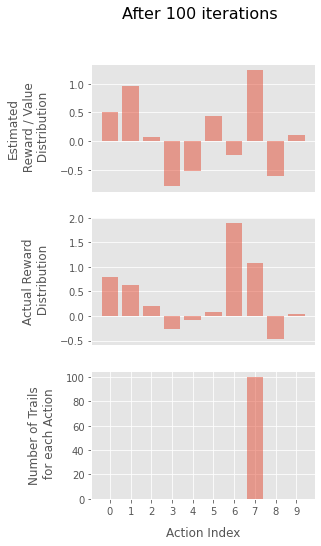

In [36]:
exp1.plot_q_comparison()

# Epsilon-Greedy Bandit

Now, we can add more exploration by adding randomness to the process of picking arms. It won't just exploit the best known action it discovered, the algo will explore some too.

This is done by changing the algo to pick the actions randomly $\epsilon$ % if the time, and keep exploiting the best estimated action for the rest.

This is easily implemented using an if-else statement:
``` 
random_num = # generate random number between 0 and 1

if random_num < epsilon:
  # pick random action
else:
  # pick action with highest Q estimate
```

So, $\epsilon$ (epsilon) can be used to control the amount of exploration done. Example values include $\epsilon=0.05$ or $0.1$.



## Implementing the Epsilon Greedy Bandit

Mainly the `act()` function needs to be changed.

In [37]:
class EpsilonGreedyBandit(GreedyBandit):
  def __init__(self,
              epsilon=0.1,
              **kwargs):
      super().__init__(**kwargs)
      self.epsilon = epsilon

  def act(self, n_iterations=1):
    for _ in range(n_iterations):
      if np.random.rand() < self.epsilon:
        action = np.random.choice(self.actions)
      else:
        action = np.argmax(self.Q_a)

      reward = self.bandit(action)
      self.N_a[action] += 1
      self.update_q(reward, action)

In [40]:
eps_bandit = EpsilonGreedyBandit(k=10, epsilon=0.1)

eps_bandit.state()

Number of times each action is taken: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Expected reward (value): 
 [ 1.45381637  0.69417236  2.46085728  0.70332575  0.98330309  2.31176092
  0.09134542  0.68217929 -1.57670044  0.48260578]
Actual Reward Distribution Mean: 
 [ 0.37293248  0.75515493 -0.81145444  0.05409755 -1.57988955 -0.48017417
 -1.20344663 -1.37345141  0.3997649   0.43565903]


In [41]:
eps_bandit.act(100)

eps_bandit.state()

Number of times each action is taken: 
 [ 3. 72.  2. 11.  2.  3.  3.  1.  2.  1.]
Expected reward (value): 
 [-0.2078316   0.76691941 -1.18077072  0.26032855 -2.63625979  0.27329183
 -0.73567647 -0.86691544 -0.011717    0.0093459 ]
Actual Reward Distribution Mean: 
 [ 0.37293248  0.75515493 -0.81145444  0.05409755 -1.57988955 -0.48017417
 -1.20344663 -1.37345141  0.3997649   0.43565903]


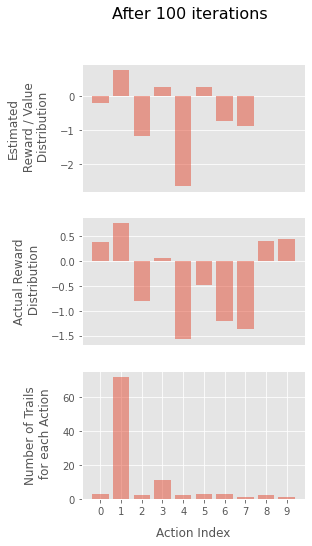

In [42]:
eps_bandit.plot_q_comparison()

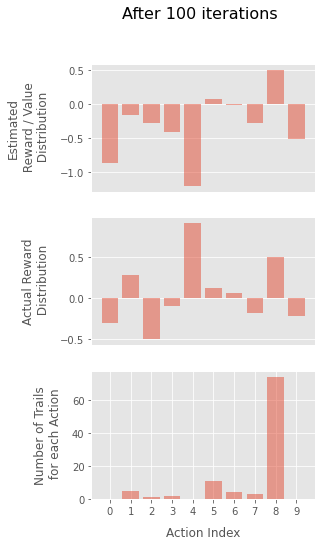

In [43]:
eps_bandit2 = EpsilonGreedyBandit(k=10, epsilon=0.2)

eps_bandit2.act(100)
eps_bandit2.plot_q_comparison()

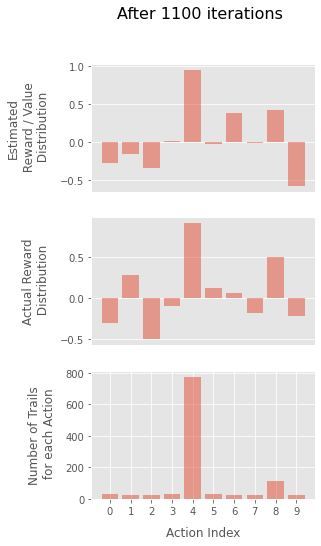

In [44]:
eps_bandit2.act(1000)
eps_bandit2.plot_q_comparison()